In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D

In [40]:
train = ImageDataGenerator(rescale=1/255)
train_url = '/content/drive/MyDrive/PicTest/CaBongMu/train'

validation = ImageDataGenerator(rescale=1/255)
validation_url = '/content/drive/MyDrive/PicTest/CaBongMu/validation'

In [41]:
train_generator = ImageDataGenerator(rotation_range = 10,
                                     zoom_range = 0.1,
                                     height_shift_range = 0.1,
                                     width_shift_range = 0.1,
                                     brightness_range = (0.9,1.1))
train_dataset = train_generator.flow_from_directory(train_url,
                                                    target_size = (150,150),
                                                    batch_size = 128,
                                                    class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(validation_url,
                                                       target_size = (150,150),
                                                       batch_size = 128,
                                                       class_mode = 'categorical')

Found 209 images belonging to 3 classes.
Found 209 images belonging to 3 classes.


In [42]:
train_dataset.class_indices

{'Cuong': 0, 'Loc': 1, 'Trong': 2}

In [43]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 conv2d_33 (Conv2D)          (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 conv2d_35 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                 

In [45]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [46]:
history = model.fit(train_dataset,batch_size=12,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
2/2 [==============================] - 94s 69s/step - loss: 4.2615 - accuracy: 0.4641 - val_loss: 1.0981 - val_accuracy: 0.2871
Epoch 2/50
2/2 [==============================] - 10s 8s/step - loss: 1.2226 - accuracy: 0.5167 - val_loss: 1.0912 - val_accuracy: 0.7656
Epoch 3/50
2/2 [==============================] - 12s 9s/step - loss: 0.7398 - accuracy: 0.6555 - val_loss: 1.0890 - val_accuracy: 0.7656
Epoch 4/50
2/2 [==============================] - 9s 6s/step - loss: 0.4387 - accuracy: 0.7560 - val_loss: 1.0867 - val_accuracy: 0.7656
Epoch 5/50
2/2 [==============================] - 9s 7s/step - loss: 0.4208 - accuracy: 0.7799 - val_loss: 1.0827 - val_accuracy: 0.7656
Epoch 6/50
2/2 [==============================] - 9s 6s/step - loss: 0.6575 - accuracy: 0.7847 - val_loss: 1.0869 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 9s 6s/step - loss: 0.6954 - accuracy: 0.6746 - val_loss: 1.0864 - val_accuracy: 0.7656
Epoch 8/50
2/2 [=====================

In [47]:
model.save('/content/drive/MyDrive/PicTest/CaBongMu/Faceid.h5')

In [48]:
model = load_model('/content/drive/MyDrive/PicTest/CaBongMu/Faceid.h5')

In [49]:
score=model.evaluate(validation_dataset,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

2/2 [==============================] - 4s 1s/step - loss: 1.0465 - accuracy: 1.0000
Sai số:  1.0464564561843872
Độ chính xác:  1.0


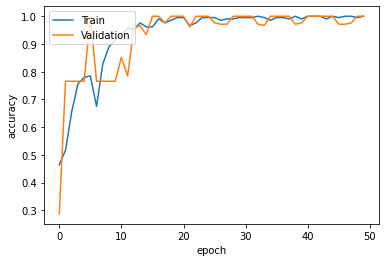

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Dự đoán là:  Cuong


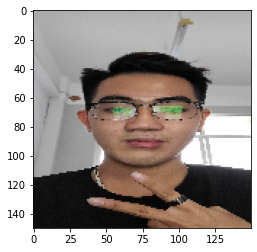

In [52]:
img = load_img('/content/drive/MyDrive/PicTest/CaBongMu/predict/Cuong.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Cuong', 'Loc', 'Trong']
print('Dự đoán là: ',Label[int(np.argmax(model.predict(img),axis=-1))])